In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('classified_reels.csv')

In [7]:
data['category'].unique()

array(['informational', 'motivation', 'emotional', 'Entertainment',
       'entertainment', 'shopping', 'travel', 'love', 'health', 'music',
       'Shopping'], dtype=object)

In [9]:
data['is_informational'] = data['category'].str.lower() == 'informational'
data.head()

,caption,comments,category,is_informational
0,riddhi_little_star\n•\nFollow\n⚠️ Why You Shou...,I’m so good at reading people. My gut is almos...,informational,True
1,kelly_weekers\n•\nFollow\nWhere my intuitive f...,👏\n😍\n😍😍\n😍❤️\n❤️❤️\n❤️\n💚💚💚\n❤\n❤️❤️❤️\n👏👏👏\n...,motivation,False
2,"infotide\n•\nFollow\nSometimes, the internet g...",Har har Mahadev 🔱🕉️\n❤️\n🙌\n😍\nBelieve in God'...,emotional,False
3,the.mumsword\n•\nFollow\nESPECIALLY when you’r...,😂😂😂👏👏\n😂😂🙌🙌\n😁 😁😁\ni'm only okay if it's my mo...,Entertainment,False
4,nodrama_marketingmama\n•\nFollow\nWhat a plot ...,😂\n😂😂😂\n😂😂😂😂😂😂\n😮😮😮\n😂😂😂😂\nFather God please f...,Entertainment,False


In [15]:
data['text'] = data['caption'].fillna('') + ' ' + data['comments'].fillna('')

In [17]:
# Step 3: Use TF-IDF vectorizer to convert text to numerical features
vectorizer = TfidfVectorizer(max_features=1000)  # Limit to top 1000 features to keep it manageable
X = vectorizer.fit_transform(data['text'])

# Output the shape of the resulting feature matrix and show a sample
X.shape, vectorizer.get_feature_names_out()[:10]  # Show first 10 feature names for preview

((164, 1000),
 array(['00', '02', '04', '05', '06', '07', '08', '09', '10', '100'],
       dtype=object))

In [27]:


# Your target (True/False) label
y = data['is_informational'].astype(int)  # Or use .values

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.8484848484848485
Precision: 0.75
Recall: 0.42857142857142855
F1 Score: 0.5454545454545454


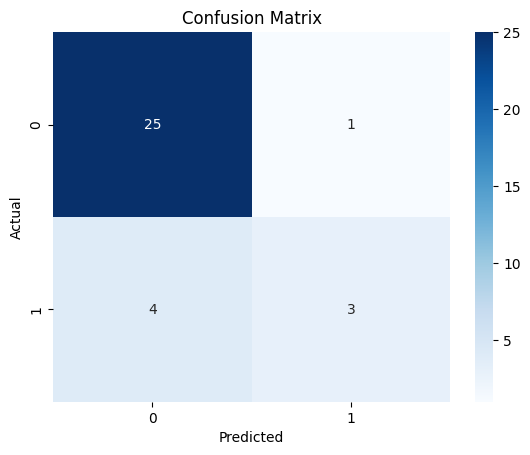

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [36]:
data['caption'].isnull().sum()

np.int64(0)

(array([  1.,   2.,  14.,  10.,  28.,  43.,  81., 242., 242., 337.]),
 array([1.        , 1.44127983, 1.88255966, 2.32383949, 2.76511932,
        3.20639915, 3.64767898, 4.08895881, 4.53023863, 4.97151846,
        5.41279829]),
 <BarContainer object of 10 artists>)

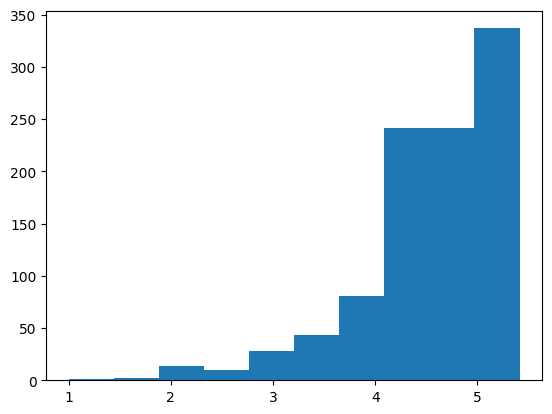

In [39]:
plt.hist(vectorizer.idf_)